In [1]:
### Installing GPN


In [2]:
#pip install git+https://github.com/songlab-cal/gpn.git

In [3]:
### quick start gouid 

In [3]:
import gpn.model
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch
from transformers import AutoModel, AutoModelForMaskedLM, AutoTokenizer

In [4]:
model_path = "songlab/gpn-brassicales"

In [6]:
#### exsample sequence
seq = "CGGGTTAAAAATCTAGTTGTTATTATTAAAGGAAATAAAATATCCTCATAAAACAATTTGTTGTAATCTATCTTTGGGCTAATGTTCTTATCCTACAAGACGAACCCTGACCGTATTCGTCGTAGAAAAAAAATTGCTTCGATCCCATCATTGAGTTCAATAATCGGCGCACAAAGGCCGATTCATAAAAACTCTAGGCCCATTAAAGTAAAGCCCATTCTCAACCCTATCCAGTCTCCCTGTATATATATATTTACGACACCAACCCAGCGTTGATATTTAATTTTCTTCAGTCAGAGATTTCGAAACCCTAGTCGATTTCGAGATCCAACTAACTCTGCTCCTTATCTCAGGTAAAATTCTCGCTCGAGAACTCAATTGCTTATCCAAAGTTCCAACTGAAGATGCTTTCCTACTGAATCTTAGGTTAATGTTTTGGATTTGGAATCTTACCCGAAATTTCTCTGCAGCTTGTTGAATTTGCGAAGTATGGGAGACGCTAGAGACAACGAAGCCTACGAGGAGGAGCTCTTGGACTATGAAGAAGAAGACGAGAAGGTCCCAGATTCTGGAAACAAAGTTAACGGCGAAGCTGTGAAAAAGTGAGTTTTATGGTTTCCTCGATATGTTTCATGTATACTACTGTGTGTTTAAATTTGTCGATTCTTAGATTACTACTTGATAACAAGTAGCAGTATGT"
len(seq)

700

In [ ]:
data_parth = "/home/johanulstrup/johan_gpn/people/johanulsrup/johan_gpn/data/ncbi_dataset/data/GCF_000264685.3/GCF_000264685.3_Panu_3.0_genomic.fna"

# Read the FASTA file using Biopython
from Bio import SeqIO

with open(data_parth, "r") as fasta_file:
    sequences = list(SeqIO.parse(fasta_file, "fasta"))

# Print the number of sequences and the first sequence as an example
print(f"Number of sequences: {len(sequences)}")
print(f"First sequence ID: {sequences[0].id}")
print(f"First sequence length: {len(sequences[0].seq)}")

FileNotFoundError: [Errno 2] No such file or directory: 'data/ncbi_dataset/data/GCF_000264685.3/GCF_000264685.3_Panu_3.0_genomic.fna'

### Tokenization
 Token Mapping:
- [PAD] → 0 (Padding token, used to make sequences the same length)
- [MASK] → 1 (Masking token, used in masked language modeling tasks)
- [UNK] → 2 (Unknown token, used when a character isn't in the vocabulary)
- a → 3
- c → 4
- g → 5
- t → 6

In [7]:
tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.get_vocab()

{'t': 6, '[PAD]': 0, 'c': 4, '[UNK]': 2, '[MASK]': 1, 'a': 3, 'g': 5}

In [8]:
input_ids = tokenizer(seq, return_tensors="pt", return_attention_mask=False, return_token_type_ids=False)["input_ids"]
print(input_ids.shape)
input_ids[0, :10]

torch.Size([1, 700])


tensor([4, 5, 5, 5, 6, 6, 3, 3, 3, 3])

In [9]:
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
print(tokens[:20])  # Show the first 20 tokens


['c', 'g', 'g', 'g', 't', 't', 'a', 'a', 'a', 'a', 'a', 't', 'c', 't', 'a', 'g', 't', 't', 'g', 't']


### Embedding 


In [10]:
# load the GPN model from "songlab/gpn-brassicales"
model = AutoModel.from_pretrained(model_path)
# shich model to evaluation this disbels training 
# Necessary when using the model for prediction rather than training.
model.eval();

In [11]:
##This disables gradient computation.
##It reduces memory usage and speeds up inference because we are not training the model (no backpropagation needed).

with torch.no_grad():
    embedding = model(input_ids=input_ids).last_hidden_state
## prints the batch size, seq length and hidden states(features in last layer)    
embedding.shape

torch.Size([1, 700, 512])

In [12]:
# Let's do a quick visualization. We'll standardize the embeddings.

In [13]:
## transforming embeding to a Panda dataframe
embedding_df = pd.DataFrame(StandardScaler().fit_transform(embedding[0].numpy()))
embedding_df.index.name = "Position"
embedding_df.columns.name = "Embedding dimension"
embedding_df

Embedding dimension,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
Position,,,,,,,,,,,,,,,,,,,,,
0,-0.518087,0.541440,0.131233,1.053508,2.222628,-0.319741,3.644270,1.093820,-1.380534,0.448887,...,-1.018207,-0.878754,-0.646708,-0.062727,-0.801978,-0.035081,2.433414,0.438933,9.229937,-1.419600
1,-0.751135,0.759646,3.220163,-1.068855,2.493009,-0.625321,2.157835,2.325140,-1.241314,-0.314622,...,-0.137703,-2.056974,1.057701,2.712366,-0.671560,-0.513204,0.225547,-0.879120,3.302933,-1.078403
2,-0.710903,-0.167388,-1.117152,-0.147014,0.793043,0.568514,-1.552413,1.677338,-2.283587,-0.763815,...,5.467333,-1.575754,1.160327,-0.117525,-0.490751,0.919967,0.110476,1.463596,1.251709,0.042052
3,-1.011557,0.004416,0.785734,0.880098,-1.314013,0.547279,-0.473241,0.107972,-1.798418,-0.059563,...,1.310845,-2.385743,-0.696326,-0.386536,0.107418,1.299432,0.853751,1.123085,-0.350535,-0.640750
4,-0.082698,-0.310122,-0.716857,3.308857,-1.243263,-1.491933,1.449806,-0.811680,-0.790326,-0.326598,...,-0.745453,-1.395645,-0.916111,-0.836169,0.454243,0.024447,-1.058236,1.308294,3.921492,0.346963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.465113,0.444199,-0.359129,-0.326517,-0.762708,-0.270667,0.442167,0.046693,0.634356,-0.058325,...,0.927363,-0.005681,-0.227225,-0.692033,-0.608916,0.124921,-0.665498,-0.061753,-0.602381,0.614786
696,-0.973834,1.042629,-0.170295,-0.246929,-0.420491,-0.682757,0.149621,0.966531,0.106323,-1.136616,...,-0.626093,-0.790863,-1.010916,3.175091,0.892961,-0.206767,-0.499504,-1.133051,-0.029236,-0.962531
697,-0.493599,0.792000,-0.298589,-0.410180,-1.292572,-0.796225,0.677159,-0.334222,-2.040731,-0.447183,...,-0.239599,0.605497,-0.869040,-0.338021,-0.572182,-0.486568,-0.789857,1.470951,-0.514977,0.262317


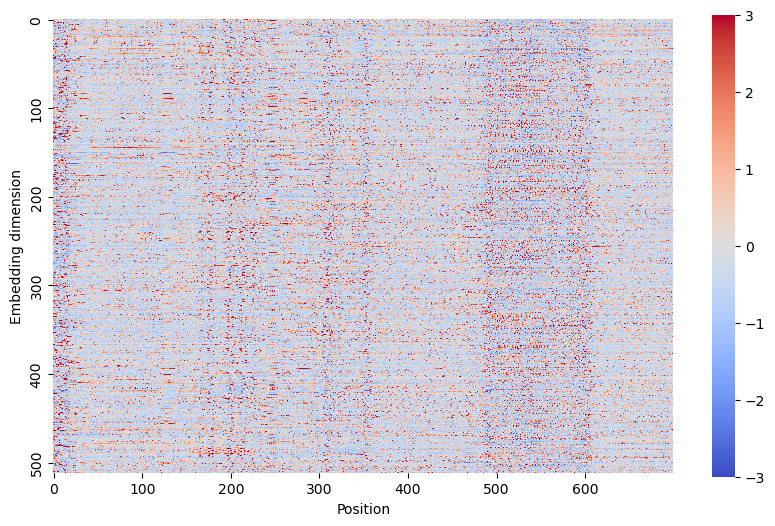

In [14]:
## wired plot of position on the x axsis and the y axsis is the last layers features
# If you squint you can see the exon locations :)
plt.figure(figsize=(10, 6))
sns.heatmap(embedding_df.T, center=0, vmin=-3, vmax=3, cmap="coolwarm", square=True, xticklabels=100, yticklabels=100);

### Masked language modeling

In [15]:
model_for_mlm = AutoModelForMaskedLM.from_pretrained(model_path)
model_for_mlm.eval();

In [16]:
seq[489:492]  # Start codon

'ATG'

In [17]:
pos = 489  # Let's mask the A and check the model predictions
input_ids[0, pos] = tokenizer.mask_token_id

In [18]:
input_ids
with torch.no_grad():
    all_logits = model_for_mlm(input_ids=input_ids).logits
all_logits.shape

torch.Size([1, 700, 7])

In [19]:
nucleotides = list('acgt')
logits = all_logits[0, pos, [tokenizer.get_vocab()[nc] for nc in nucleotides]]
logits

tensor([ 4.8509, -2.3441, -1.7025, -1.5116])

In [20]:
probs = torch.nn.functional.softmax(logits, dim=0).numpy()
probs

array([9.9611449e-01, 7.4742857e-04, 1.4196951e-03, 1.7183293e-03],
      dtype=float32)

<Axes: xlabel='nucleotide', ylabel='probability'>

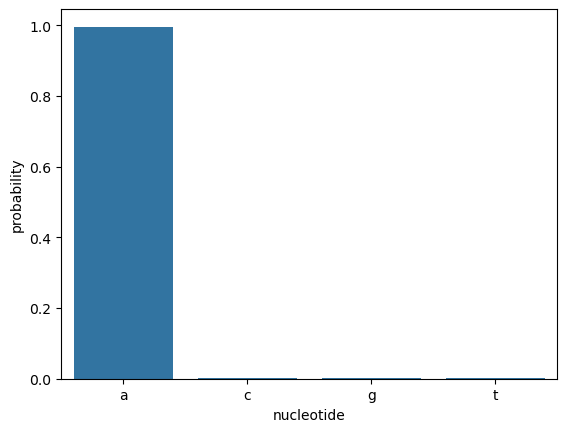

In [21]:

probs_df = pd.DataFrame(dict(nucleotide=nucleotides, probability=probs))
sns.barplot(data=probs_df, x="nucleotide", y="probability")

In [22]:
## some tesing of prediciton missing data

In [23]:
masked_seq = "CGGGTTAAAAATCTAGTTGTT[MASK]TTATTAAAGGAAATAAAAT"

# Tokenize the sequence
input_ids = tokenizer(masked_seq, return_tensors="pt")["input_ids"]

# Get model predictions
with torch.no_grad():
    outputs = model_for_mlm(input_ids=input_ids)

# Extract the predicted token at the masked position
masked_index = (input_ids[0] == tokenizer.mask_token_id).nonzero(as_tuple=True)[0].item()
predicted_id = outputs.logits[0, masked_index].argmax(dim=-1).item()
predicted_token = tokenizer.convert_ids_to_tokens(predicted_id)

print(f"Predicted missing nucleotide: {predicted_token}")


Predicted missing nucleotide: a


In [1]:
## redu on our data
#https://github.com/songlab-cal/gpn/blob/main/analysis/gpn_arabidopsis/vep_aragwas.ipynb

In [5]:
#data
data=f"/home/johanulstrup/baboondiversity/data/callability_panu3_26_04_2021"
#unmasked
file_1="Papio_anubis.Panu_3.0.dna.chromosome.1.fa"
#masked
file_2="Panu_3.0_callability_mask_chrX.fa"


SyntaxError: invalid syntax (242501280.py, line 3)